In [1]:
# Run this cell to load the graphics packages

using Plots; gr()
using Interact

INFO: Interact.jl: using new nbwidgetsextension protocol


## Function parameters

In the last notebook, we saw an example of adding **parameters** to functions. These are values that control the behavior of a function. Let's look at that in some more detail.

Let's go back to our original version of the σ function:

In [2]:
σ(x) = 1 / (1 + exp(-x))

σ (generic function with 1 method)

Instead of working with a single function, we can work with a whole class (set) of functions that look similar but differ in the value of a **parameter**. Let's make a new function that uses the previous $\sigma$ function, but also has a parameter, $w$. Mathematically, we could write

$$f_w(x) = f(x; w) = \sigma(w \, x).$$

($w$ and $x$ are multiplied in the argument of $\sigma.)

Mathematically speaking, we can think of $f_w$ as a different function for each different value of the parameter $w$.

In Julia, we write this as follows:

In [5]:
f(x, w) = σ(w * x)

f (generic function with 1 method)

Note that Julia just treats parameters as additional *arguments* to the function; the function `f` has two arguments, the value of `x` and the value of `w` that we want to use.

We can now investigate the effect of $w$ interactively. To do so, we need a way of writing in Julia "the function of one variable $x$ that we obtain when we fix the value of $w$". We write this as an "anonymous function", as we saw in the notebook on functions:

    x -> f(x, w)
    
We can read this as "the function that maps $x$ to the value of $f(x, w)$".

Now we are ready to draw the function. For each plot, we *fix* a value of the parameter $w$ and draw the resulting function as a function of $x$. However, `Interact.jl` then allows us to modify interactively the value of $w$, and plot the new function that comes out:

Interact.Options{:SelectionSlider,Float64}(5: "input-3" = 0.0 Float64 , "w", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

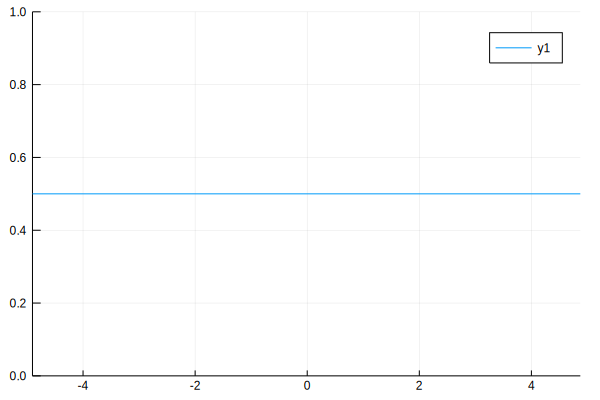

In [6]:
@manipulate for w in -2:0.01:2
    
    plot(x->f(x, w), -5, 5, ylims=(0,1))
    
end

#### Exercise

Try writing your own function that takes a parameter. Start by copying and executing

```julia
square(x) = x^2
```

Then use `square` to declare a new function `square_and_scale` that takes two inputs, `a` and `x` such that

$$\mathrm{square\_and\_scale}(x; a) := a \cdot x^2$$

Once you have declared `square_and_scale`, uncomment the code below and see how the parameter `a` scales the function `square` :

In [ ]:
# x = -10:10
# @manipulate for a in 0:0.01:10
#     plot(x, square.(x), label="x^2")
#     plot!(x, square_and_scale.(x, a), ls=:dash, label="ax^2")
# end

## Fitting a function to data

As we saw in the previous notebook, what we would like to do is use the fact that we now have a parameter in our function in order to do something useful! Namely, we want to model data with it.

So suppose that we are given a single data point $(x_0, y_0) = (2, 0.8)$. We can try to "fit" the function $f_w$ by adjusting the parameter $w$ until the function passes through the data.

**Game**: Move the slider until the graph of the function hits the data point. Which value of $w$ does that correspond to?

Interact.Options{:SelectionSlider,Float64}(13: "input-5" = 0.0 Float64 , "w", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

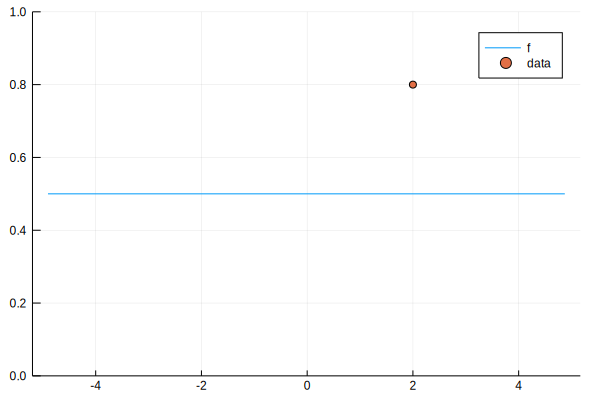

In [8]:
x0, y0 = 2, 0.8

@manipulate for w in -2:0.01:2
    plot(x->f(x, w), -5, 5, ylims=(0, 1), label="f")
    scatter!([x0], [y0], label="data")
end

## Quantifying how far we are from the goal: the *loss function*

We can see visually when the graph of the function passes through the data point. But the goal is to be able to automate this process so that the computer can do it unaided. 

So we will need a more precise way of deciding and quantifying (i.e. measuring with a number) *how far away we are from the goal*; here, the goal means hitting the data point with the function.

**Exercise**: Can you think of a way of measuring how far away our function is from the data point?

**Solution**:

We need to measure how far away the curve is from the data point when we choose a particular value of $w$.
One way to do this is by finding the vertical distance $d$ from the curve to the data point.

Instead of just taking the distance, it is common to take the *square* of the distance, $d^2$.

Since we are taking the vertical distance, we need the distance at the given value of $x_0$ where the data point lies. For a given value of the parameter $w$, the point on the curve with that value of $x_0$ is $f(x_0, w)$.

So we have
$$d = y_0 - f(x_0, w)$$

and
$$d^2 = [y_0 - f(x_0, w)]^2$$

This is our measure of distance. It will change when $w$ changes -- in other words, it is itself a *function of $w$*; we will denote this function by $L(w)$, and call it the **loss function**:

$$L(w) := [y_0 - f(x_0, w)]^2.$$

So the goal is to find the value $w^*$ of $w$ where the loss function is *least*; in other words, we need to *minimize* the loss function!

(Another name for a loss function is a *cost function*.)

**Exercise**: 
(a) Define the loss function `L(w)` in Julia.

(b) Draw the data point and the function. Also draw a vertical line from the data point to the function.

(c) Make the plot interactive.

(d) Add as the plot title the value of the loss function for the current value of $w$.

(e) Use the slider to find the value $w^*$ of $w$ for which the loss function reaches its minimum value. What is $w^*$? What is the value of the loss function there, $L(w^*)$?

**Solution**:

Interact.Options{:SelectionSlider,Float64}(49: "input-14" = 0.0 Float64 , "w", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

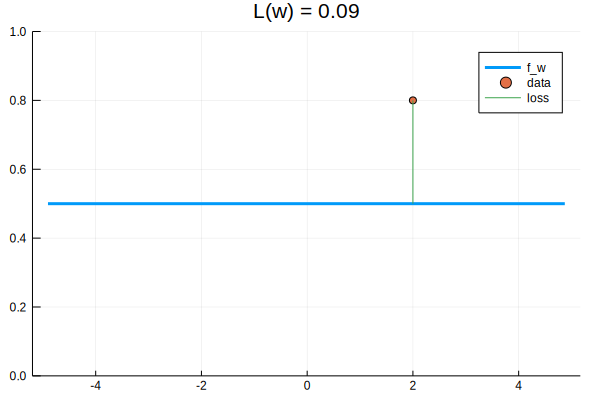

In [24]:
x0, y0 = 2, 0.8

L(w) = (y0 - f(x0, w))^2

@manipulate for w in -2:0.01:2
    
    plot(x->f(x, w), -5, 5, ylims=(0, 1), label="f_w", lw=3)  # function

    scatter!([x0], [y0], label="data")
    plot!([x0, x0], [y0, f(x0, w)], label="loss")  # vertical line

    title!("L(w) = $(round(L(w), 5))")

end

## What does the loss function look like?

The loss function $L(w)$ tells us how far away the function $f_w$ is from the data when the parameter value is $w$, represented visually as the vertical line in the previous plot. When the data are fixed, this is a function only of the parameter $w$. What does this function look like as a function of $w$? Let's draw it!

**Exercise**: Draw the function $L(w)$ as a function of $w$.

**Solution**:

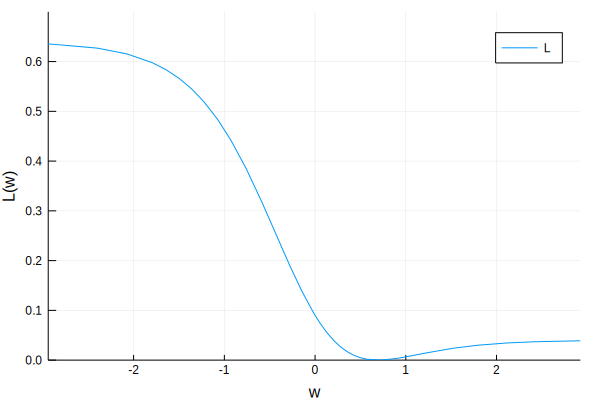

In [14]:
x0, y0 = 2.0, 0.8

L(w) = (y0 - f(x0, w))^2

plot(L, -3, 3, xlabel="w", ylabel="L(w)", ylims=(0, 0.7), label="L")

This graph quantifies how far we are from the data point for a given value of $w$.
What features can we see from the graph?

Firstly, we see that $L(w)$ is always bigger than $0$, for any value of $w$. This is because we want $L$ to be some kind of measure of *distance*, and distances cannot be negative. 

Secondly, we see that in fact, there is a special value $w^*$ of $w$ where the function $L$ *reaches* $0$.
This means that the original function $f$ (the one we manipulated above) exactly passes through the data point $(x_0, y_0)$. 

**Exercise**: Draw a zoomed in version of the graph to find the place $w^*$ where the function hits $0$ more precisely.

### A different way of defining the loss function

**Why did we use such a complicated function $L$ with those squares inside?** We could instead just have used the absolute distance, instead of the distance squared, using the *absolute value* function, written mathematically as $| \cdot |$, and in Julia as `abs`. 

**Exercise**: Define a new loss function, `L_abs`, using the absolute value, and see what it looks like.

**Solution**: 

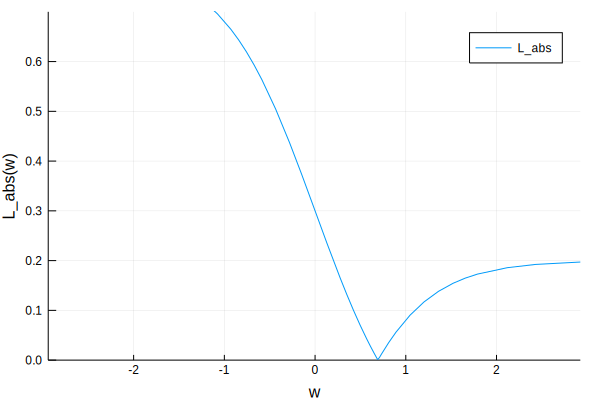

In [17]:
x0, y0 = 2.0, 0.8

L_abs(w) = abs(y0 - f(x0, w))

plot(L_abs, -3, 3, xlabel="w", ylabel="L_abs(w)", ylims=(0, 0.7), label="L_abs")

Now we see why it was previously generally preferred to use squares: using the absolute value gives a cost function that is *not smooth*. This makes it difficult to use methods from calculus to find the minimum. Nonetheless, using non-smooth functions is very common in machine learning nowadays.

## Adding more data

Above, we saw how we could adjust a parameter to make a curve fit a single data point. What if there is more data to fit?

Suppose there are now two data points to fit, the previous $(x_0, y_0)$ together with $(x_1, y_1) = (-3, 0.3)$.

**Exercise**: Make an interactive plot of the function $f_w$ together with the two data points. Can you make the graph of $f_w$ pass through *both* data points at the *same* time?

You should have found that it's actually *impossible* to fit both data points at the same time! The best we could do is to *minimise* how far away the function is from the data. To do so, we need to somehow balance the distance from each of the two data points.

**Exercise**: Play with the slider to find the value $w^*$ of $w$ that you think has the "least error" in an intuitive sense.

## Defining a loss function

How can we *quantify* some kind of overall measure of the distance from *all* of the data? Well, we just need to define a new loss function! One way to do so would be to sum up the loss functions for each data point, i.e. the sum of the squared vertical distances from the graph to each data point:

$$L(w) = [y_0 - f_w(x_0)]^2 + [y_1 - f_w(x_1)]^2.$$

Since the two pieces that we are adding have the same structure, we can simplify this by writing it as a sum:

$$L(w) = \sum_i [y_i - f_w(x_i)]^2.$$

So now we want to find the value $w^*$ of $w$ that minimizes this new function $L$!

Interact.Options{:SelectionSlider,Float64}(57: "input-16" = 0.0 Float64 , "w", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

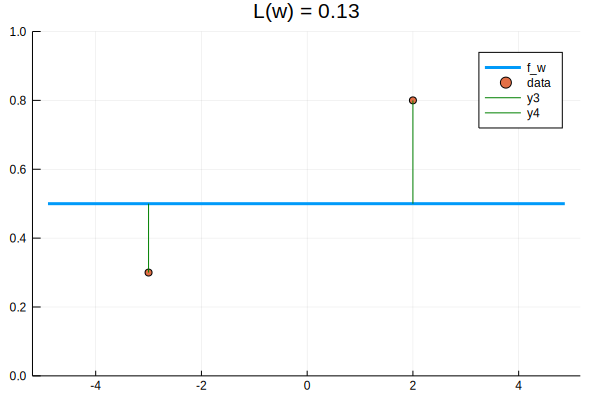

In [26]:
xs = [2, -3]
ys = [0.8, 0.3]

L(w) = sum( (ys .- f.(xs, w)) .^ 2 )

@manipulate for w in -2:0.01:2
    
    plot(x->f(x, w), -5, 5, ylims=(0, 1), lw = 3, label="f_w")
    
    scatter!(xs, ys, label="data")

    for i in 1:2
        plot!([xs[i], xs[i]], [ys[i], f(xs[i], w)], c=:green)
    end

    
    title!("L(w) =  $(round(L(w), 5))")

end

After playing with this for a while, it is intuitively obvious that we cannot make the function pass through both data points for any value of $w$. In other words, our cost function, `L(w)`, is never zero.

**Exercise**: What is the minimum value of `L(w)` that you can find by altering `w`? What is the corresponding value of `w`?

### Sums in Julia

To generate the above plot we used the `sum` function. `sum` can add together all the elements of a collection or range, or it can add together the outputs of applying a function to all the elements of a collection or range. 

Look up the docs for `sum` via

```julia
?sum
```
if you need more information.

**Exercise**: 

Use `sum` to add together all integers in the range 1 to 16, inclusive. What is the result?

#### Exercise

What is the sum of the absolute values of all integers between -3 and 3? Use `sum` and the `abs` function.

## What does $L$ look like?

In our last attempt to minimize `L(w)` by varying `w`, we saw that `L(w)` always seemed to be greater than 0.  Is that true? Let's plot it to find out!

#### Exercise

Plot the new loss function $L(w)$ as a function of $w$.

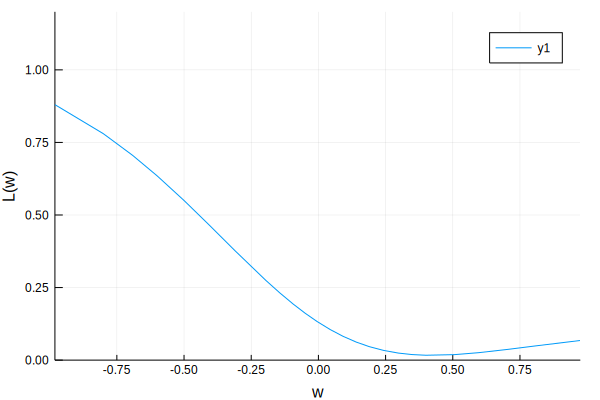

In [28]:
plot(L, -1, 1, xlabel="w", ylabel="L(w)", ylims=(0, 1.2))

The first thing to notice is that $L$ is always positive. Since it is the sum of squares, and squares cannot be negative, the sum cannot be negative either! 

However, we also see that although $L$ dips close to $0$ for a single, special value $w^* \simeq 0.4$, it never actually *reaches* 0! Again we could zoom in on that region of the graph to estimate it more precisely.

We might start suspecting that there should be a better way of using the computer to minimize $L$ to find the location $w^*$ of the minimum, rather than still doing everything by eye. Indeed there is, as we will see in the next two notebooks!

## Adding more parameters to the model

If we add more parameters to a function, we may be able to improve how it fits to data. For example, we could define a new function $g$ with another parameter, a shift or **bias**:

$$g(x; w, b) := \sigma(w \, x) + b.$$

In [29]:
g(x, w, b) = σ(w*x) + b

g (generic function with 1 method)

*Note*: In the last notebook, we added parameters to a sigmoid function to get the form $$\sigma(w \, x + b)$$ and here we are working with the form $$\sigma(w \, x) + b$$
instead. Both of these are valid ways to apply a bias to a function! In machine learning terminology, the first is a neural network with a single neuron, and the second can be thought of as a network with two layers.

**Exercise**: Make an interactive visualization with two sliders for $w$ and $b$. Play with the sliders to try and fit *both* data points at once!

**Solution**:

Interact.Options{:SelectionSlider,Float64}(71: "input-21" = 0.0 Float64 , "w", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(73: "input-22" = 0.0 Float64 , "b", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

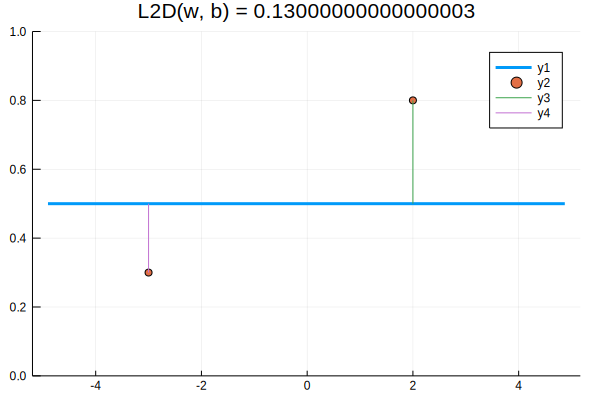

In [33]:
xs = [2, -3]
ys = [0.8, 0.3]

L2D(w, b) = sum( (ys .- g.(xs, w, b)) .^ 2)

@manipulate for w in -2:0.01:2, b in -2:0.01:2
    plot(x -> g(x, w, b), -5, 5, ylims=(0, 1), lw=3)
    
    scatter!(xs, ys)

    for i in 1:2
        plot!([xs[i], xs[i]], [ys[i], g(xs[i], w, b)])
    end
    
    
    title!("L2D(w, b) = $(L2D(w, b))")

end

You should be able to convince yourself that we can now make the curve pass through both points simultaneously. 

#### Exercise

For what values of `w` and `b` does the line pass through both points?

## Fitting both data points: a loss function

Following the procedure that we used when we had a single parameter, we can think of the fitting procedure once again as minimizing a suitable *loss function*. The expression for the loss function is almost the same, except that now $f$ has two parameters $w$ and $b$, so the loss function $L_2$ is itself a function of $w$ *and* $b$:

$$L_2(w, b) = \sum_i [y_i - f(x_i; w, b)]^2.$$

So we want to minimize this loss function over *both* of the parameters $w$ and $b$! Let's plot it.

**Exercise**: Define the function `L2` in Julia.

In [35]:
L2(w, b) = sum( (ys .- g.(xs, w, b)) .^ 2 )

L2 (generic function with 1 method)

To plot the cost as a function of *two* variables (the weights *and* the bias), we will make use of the `surface` function.  To get a nice interactive 3D plot, we will use the PlotlyJS "backend" (plotting engine):

In [41]:
plotlyjs()  # load the backend

Plots.PlotlyJSBackend()

In [42]:
ws = -2:0.05:2
bs = -2:0.05:2

surface(ws, bs, L2, alpha=0.8, zlims=(0,3))   # alpha gives transparency

Try rotating and zooming the plot with the mouse!

If we rotate the surface around, we can see that indeed there is a unique point $(w^*, b^*)$ where the function $L_2$ attains its minimum. You can try different ranges for the $x$, $y$ and $z$ coordinates to get a better view.

## More data

If we add more data, however, we will again not be able to fit all of the data; we will only be able to attain a "best fit".

Let's create `xs` and `ys` with some more data:

In [43]:
xs = [2, -3, -1, 1]
ys = [0.8, 0.3, 0.4, 0.4]

4-element Array{Float64,1}:
 0.8
 0.3
 0.4
 0.4

#### Exercise

a) Make an interactive visualization of the function $f$ and the data. Try to find the values of $w$ and $b$ that give the best fit.

b) Define the loss function and plot it.

and now we can try to plot our best fit, given all this data:

## Solution

In [48]:
gr()

Plots.GRBackend()

Interact.Options{:SelectionSlider,Float64}(93: "input-29" = 0.0 Float64 , "w", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(95: "input-30" = 0.0 Float64 , "b", 0.0, "0.0", 201, Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.99"=>-1.99,"-1.98"=>-1.98,"-1.97"=>-1.97,"-1.96"=>-1.96,"-1.95"=>-1.95,"-1.94"=>-1.94,"-1.93"=>-1.93,"-1.92"=>-1.92,"-1.91"=>-1.91…), Dict(-0.92=>"-0.92",1.2=>"1.2",1.68=>"1.68",-0.22=>"-0.22",-1.78=>"-1.78",1.19=>"1.19",-1.23=>"-1.23",0.22=>"0.22",-1.16=>"-1.16",0.2=>"0.2"…)), Any[], Any[], true, "horizontal", true)

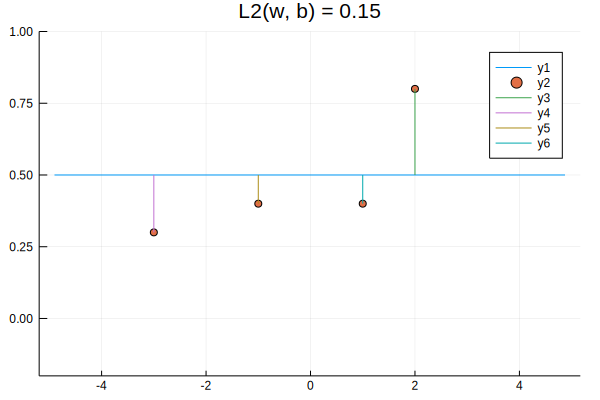

In [49]:
L2(w, b) = sum( (ys .- g.(xs, w, b)) .^ 2)

@manipulate for w in -2:0.01:2, b in -2:0.01:2
    plot(x->g(x, w, b), -5, 5, ylims=(-0.2, 1))
    
    scatter!(xs, ys)

    for i in 1:length(xs)
        plot!([xs[i], xs[i]], [ys[i], g(xs[i], w, b)])
    end
    
    
    title!("L2(w, b) = $(round(L2(w, b), 5))")

end

Let's define the cost function that we're using above so that we can plot it as a function of the parameters `w` and `b`.

#### Exercise

We've seen the cost function, $$C_{2D}(w, b) = \sum_i(ys_i - g(xs_i, w, b))^2$$ written in Julia as

```julia
L2(w, b) = sum( (ys .- g.(xs, w, b)) .^ 2 )
```

a few times now. To ensure you understand what this function is doing, implement your own loss function using the commented code below. Do this without using `sum`, `abs2`, or broadcasting dot syntax (for example, `.-`). Hint: you'll want to use a `for` loop to do this.

In [50]:
# function myL2(w, b)
#     loss = 0.0
    
#     return loss
# end

Now that you've defined `L2`, we can plot it using `surface`!

In [52]:
plotlyjs()

ws = -2:0.05:2
bs = -2:0.05:2

surface(ws, bs, L2, alpha=0.8, zlims=(0,3))